- MNE・オープンデータ (2022/12/26)
- 周波数解析 (2022/12/26)
  - フーリエ変換・パワースペクトル密度
  - 周波数フィルタ
- 独立成分分析 (2022/12/26)
- エポッキング
  - 加算平均

# MNE・オープンデータ

- [MNE](https://mne.tools/stable/index.html)
  - 脳波解析のためのPythonライブラリ
  - オープンデータ取得や周波数解析，加算平均などが簡単に実装できる．
  - ここではデータセットの取得のみMNEで行い，解析は一般的なライブラリのみで実装する．
- [EEGBCIデータセット](https://physionet.org/files/eegmmidb/1.0.0/)
  - 運動に関する脳波のデータセット．MNE経由でもDLできる．
  - 64チャンネル，サンプリング周波数160 Hz
  - 109被験者，14実験
    - 1: ベースライン，開眼
    - 2: ベースライン，閉眼
    - 3, 7, 11: 運動実行（左手/右手）
    - 4, 8, 12: 運動想起（左手/右手）
    - 5, 9, 13: 運動実行（手/足）
    - 6, 10, 14: 運動想起（手/足）
  - 各時系列において，125秒間のうちのある時刻（複数）に対応する運動（動作や想起）をしている．
    - BCIに応用：運動想起データを学習し，ある時刻tに「左手を動かした」ことが推定できれば，思念で運動の意思を外部に伝えることができる．

In [9]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# 被験者1，運動想起(6)のデータを取得
raw = mne.io.read_raw_edf(mne.datasets.eegbci.load_data(1, 6)[0])
# RawオブジェクトからNumPy配列，DataFrameに変換
x, t = raw.get_data(return_times=True)
df = pd.DataFrame(x.T, index=t, columns=raw.ch_names)
df

Extracting EDF parameters from C:\Users\bqi11\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,P8..,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..
0.00000,0.000073,0.000073,0.000091,0.000116,0.000101,0.000107,0.000062,0.000035,0.000058,0.000058,...,0.000036,0.000048,0.000046,0.000065,0.000039,0.000073,0.000029,-0.000004,0.000059,-0.000092
0.00625,0.000063,0.000064,0.000078,0.000107,0.000086,0.000087,0.000044,0.000036,0.000061,0.000058,...,0.000043,0.000062,0.000056,0.000068,0.000043,0.000088,0.000032,0.000004,0.000069,-0.000093
0.01250,0.000082,0.000074,0.000082,0.000100,0.000083,0.000081,0.000048,0.000049,0.000067,0.000058,...,0.000041,0.000049,0.000040,0.000043,0.000025,0.000079,0.000025,-0.000003,0.000065,-0.000102
0.01875,0.000063,0.000042,0.000050,0.000065,0.000059,0.000061,0.000032,0.000024,0.000035,0.000023,...,0.000034,0.000040,0.000029,0.000033,0.000014,0.000069,0.000013,-0.000016,0.000050,-0.000107
0.02500,0.000051,0.000039,0.000052,0.000081,0.000069,0.000073,0.000039,0.000018,0.000035,0.000030,...,0.000034,0.000056,0.000049,0.000056,0.000025,0.000075,0.000015,-0.000013,0.000044,-0.000094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124.96875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
124.97500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
124.98125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
124.98750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Text(0, 0.5, 'amplitude [V]')

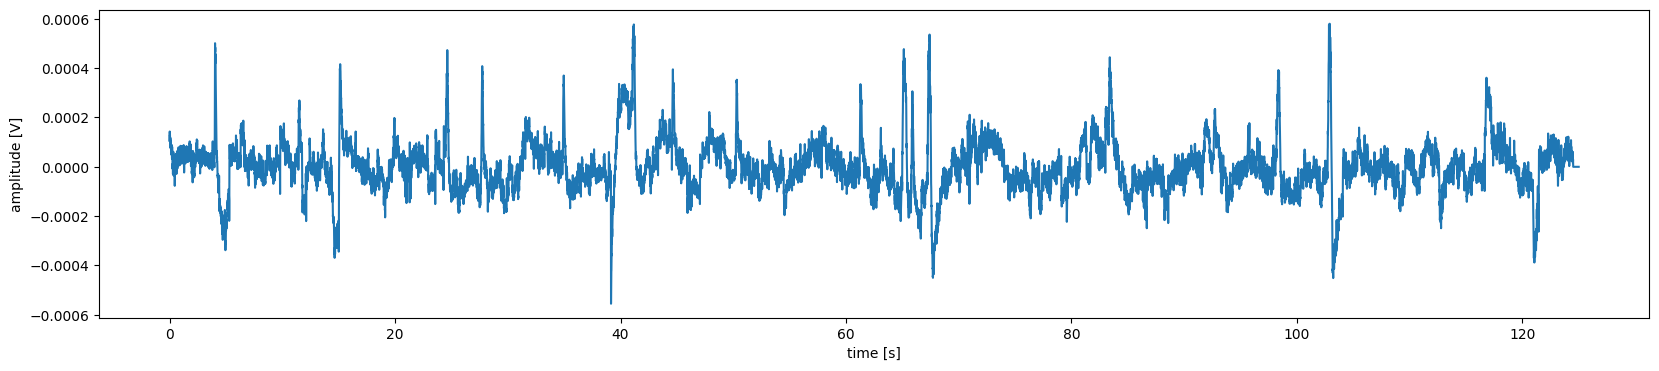

In [149]:
# Fp1(左前頭極：左目の真上)のデータ
df["Fp1."].plot(figsize=(20, 4))
plt.xlabel("time [s]")
plt.ylabel("amplitude [V]")

# 周波数解析

## フーリエ変換・パワースペクトル密度
- フーリエ変換により，ある周波数成分がどれくらい強いかわかる．
- フーリエ係数を N/2 で割ることで，その周波数成分の振幅（と同じ単位）になる．
  - N: データ数
  - より厳密には，交流成分はN/2で，直流成分（基本周波数成分）はNで割る．
- 一般的に，この振幅Aに対して $10 log_{10}(\frac{f_s}{N} A^2)$ で計算される **パワースペクトル密度(PSD)** を見る．

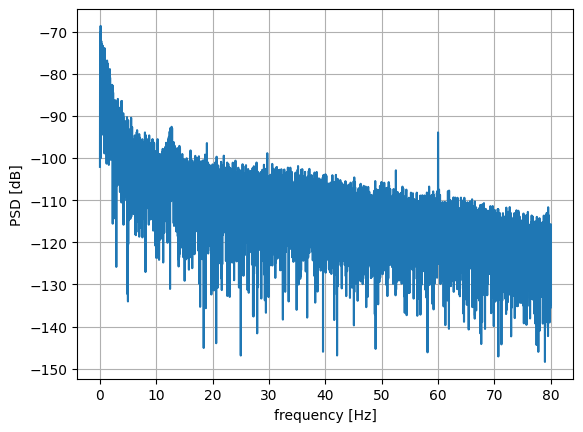

In [150]:
def compute_psd(x, fs):
    N = len(x)
    # フーリエ変換
    X = np.fft.rfft(x)
    freq = np.fft.rfftfreq(N, 1/fs)
    # 振幅・パワースペクトル密度に変換
    A = np.abs(X) / (N/2)
    A[0] /= 2
    PSD = 10 * np.log10((A**2) / (fs/N))
    return freq, X, PSD

# 周波数軸，フーリエ係数，PSD
freq, X, PSD = compute_psd(df["Fp1."], raw.info["sfreq"])
plt.plot(freq, PSD)
plt.xlabel("frequency [Hz]")
plt.ylabel("PSD [dB]")
plt.grid()

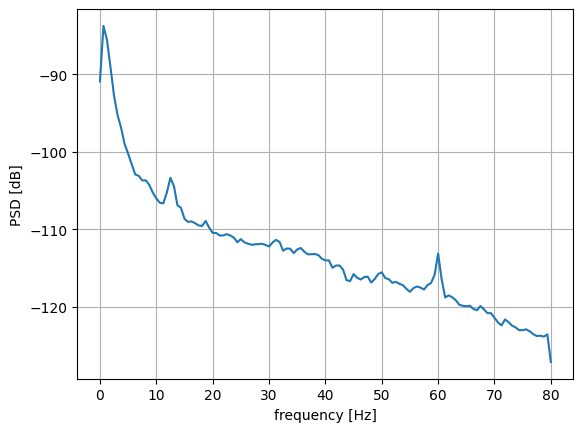

In [151]:
# SciPyのWelch法による計算
from scipy import signal
freq, PSD = signal.welch(df["Fp1."], raw.info["sfreq"])
plt.plot(freq, 10*np.log10(PSD))
plt.xlabel("frequency [Hz]")
plt.ylabel("PSD [dB]")
plt.grid()

考察

- 12 Hz あたりにピークがある → α波？
  - α波は何もしていなくてもある程度出る．
- 60 Hz にもピーク → **電源ノイズ**
  - ノッチフィルタを用いて除去が必要

## 短時間フーリエ変換

- 運動時や運動想起時，α波やβ波が減衰することが知られている（**事象関連脱同期**）．
- ある期間に対してフーリエ変換し，その期間を少しずつずらして周波数スペクトルの変化を見てみる．

## 周波数フィルタ
- フーリエ変換結果に対し，一部の周波数帯の値（フーリエ係数）を小さくして逆変換することで，その周波数成分を除去できる．
- ノッチフィルタ：特定の周波数成分を除去
  - 例：60 Hz の電源ノイズ成分を除去する．
- バンドパスフィルタ：特定の周波数「帯」を除去
  - 例：7-13 Hz 以外を除去することでα波成分のみを抽出する．
  - 例：事象関連脱同期を調べるために 7-30 Hz 以外を除去し，α波・β波を抽出する．

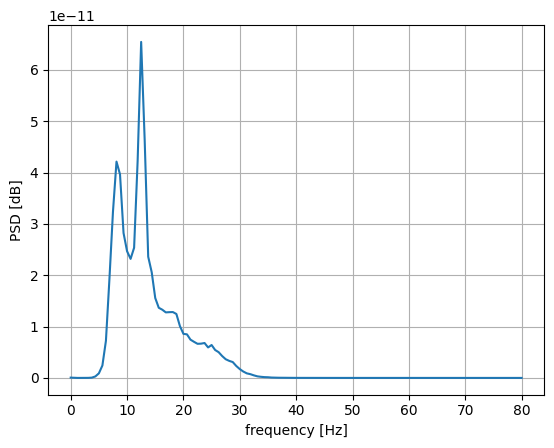

In [163]:
# scipy.signalでノッチフィルタ・バンドパスフィルタ
fn = raw.info["sfreq"] / 2  # ナイキスト周波数 = サンプリング周波数 / 2
X_filt = signal.lfilter(*signal.iirnotch(60, 4, raw.info["sfreq"]), df, axis=0)
X_filt = signal.lfilter(*signal.butter(5, np.array([7, 30])/fn, btype="bandpass"), X_filt, axis=0)
# 周波数成分を確認
freq, PSD = signal.welch(X_filt[:, 0], raw.info["sfreq"])
plt.plot(freq, PSD)
plt.xlabel("frequency [Hz]")
plt.ylabel("PSD [dB]")
plt.grid()

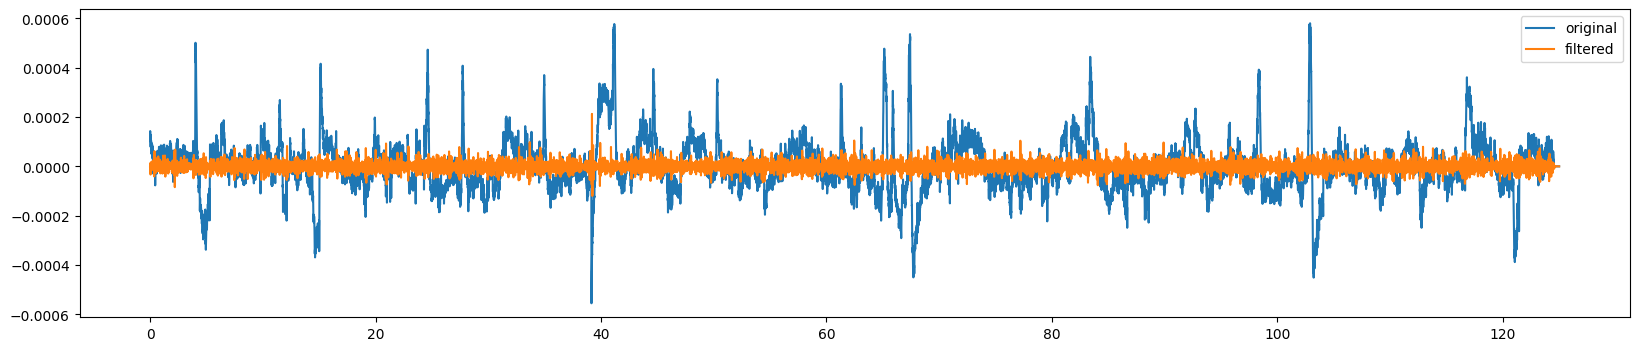

In [164]:
# 変換後の波形を確認
df["Fp1."].plot(label="original", figsize=(20, 4))
plt.plot(t, X_filt[:, 0], label="filtered")
plt.legend()

ギザギザがすこし緩やかになり（高周波成分が減り），大きな変動がなくなっている（低周波成分も減っている）

# 独立成分分析(ICA)
- Fp1の生波形を改めて見ると，不定期に異常なピークがある．→ 瞬きによる筋電ノイズ
  - 目から離れた部位には出ていない．
- これをICAを用いて除去する．
  - 周波数フィルタによってもなくなっているように見えるが，大きな動きが低周波成分として除去されただけで，瞬目アーチファクト成分を狙って除去しているわけではない．
- ICAは複数の信号が混ざった信号から元の信号を推定する手法（信号源推定）であり，これを使うことで瞬目アーチファクトの成分を抽出し，除去することができる．
  - ※観測脳波は本来の脳波と瞬目アーチファクトの混合波であると考える．
  - 主成分分析と同様に，混合波と構成波の関係は射影変換で表現できるので，変換により構成波に分離できたら，瞬目成分の波を0にして逆変換すれば除去できる．
  - 理論の詳細はそのうち追記する予定．

<AxesSubplot: >

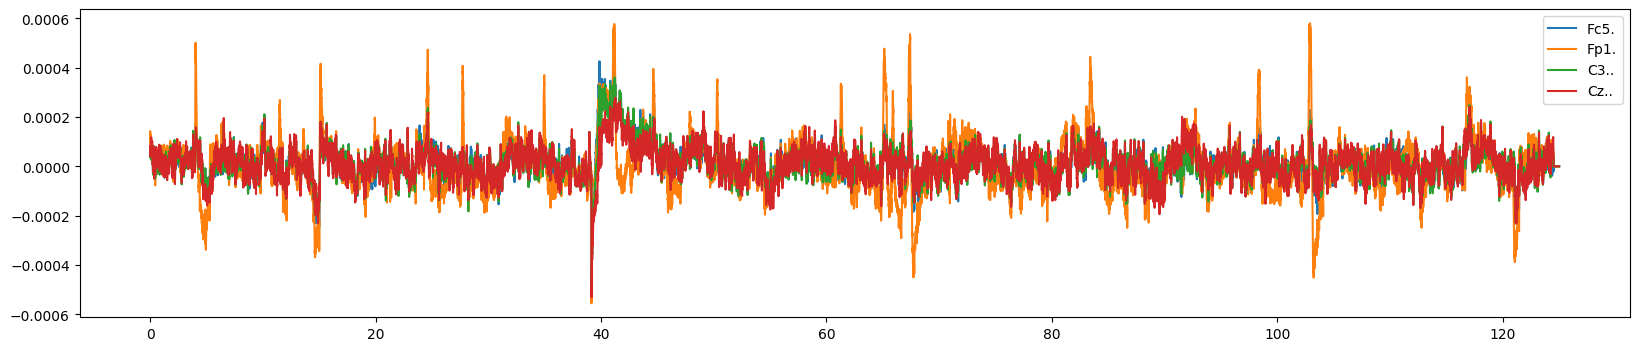

In [171]:
X = df[["Fc5.", "Fp1.", "C3..", "Cz.."]]
X.plot(figsize=(20, 4))

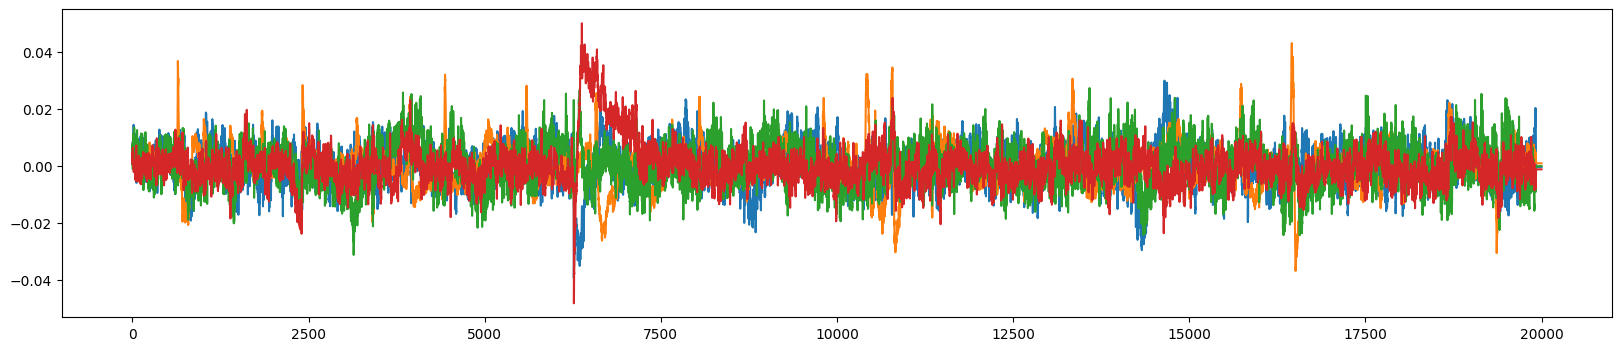

In [179]:
# ICAで構成波を推定
from sklearn.decomposition import FastICA
ica = FastICA(whiten="arbitrary-variance", max_iter=1000, random_state=0).fit(X)
X_ica = ica.transform(X)
# プロット．第2独立成分(橙)が瞬目成分っぽい．
plt.figure(figsize=(20, 4))
plt.plot(X_ica[:, :4])
plt.show()

第2独立成分(橙)が瞬目成分っぽいので，これを0にして逆変換すれば除去できる．

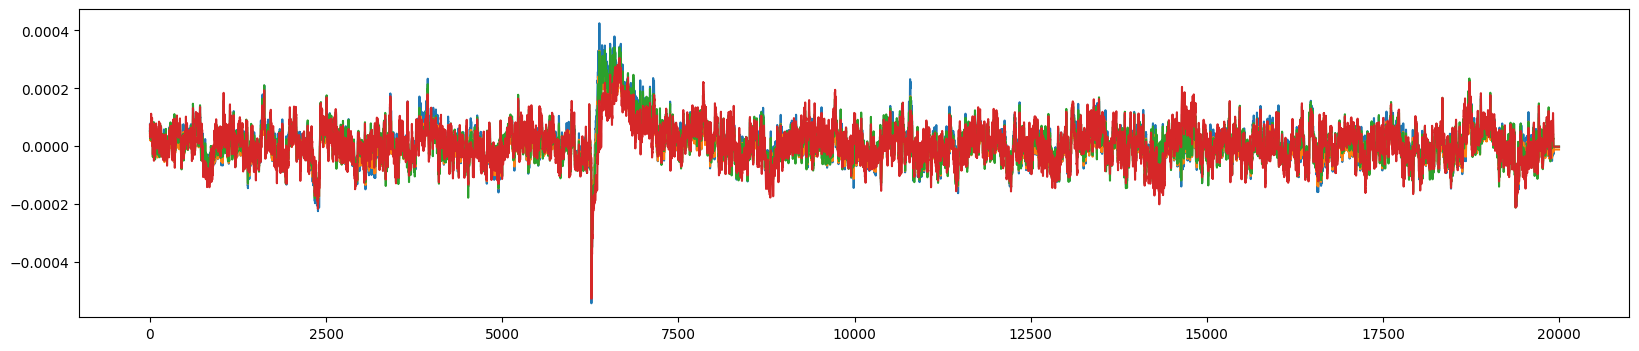

In [181]:
# 第2独立成分を除去
X_ica[:, 1] = 0
x_filtered = ica.inverse_transform(X_ica)

plt.figure(figsize=(20, 4))
plt.plot(x_filtered)
plt.show()

# エポッキング
作成中

In [11]:
events, _ = mne.events_from_annotations(raw)
events

Used Annotations descriptions: ['T0', 'T1', 'T2']


(array([[    0,     0,     1],
        [  672,     0,     3],
        [ 1328,     0,     1],
        [ 2000,     0,     2],
        [ 2656,     0,     1],
        [ 3328,     0,     2],
        [ 3984,     0,     1],
        [ 4656,     0,     3],
        [ 5312,     0,     1],
        [ 5984,     0,     3],
        [ 6640,     0,     1],
        [ 7312,     0,     2],
        [ 7968,     0,     1],
        [ 8640,     0,     2],
        [ 9296,     0,     1],
        [ 9968,     0,     3],
        [10624,     0,     1],
        [11296,     0,     2],
        [11952,     0,     1],
        [12624,     0,     3],
        [13280,     0,     1],
        [13952,     0,     3],
        [14608,     0,     1],
        [15280,     0,     2],
        [15936,     0,     1],
        [16608,     0,     2],
        [17264,     0,     1],
        [17936,     0,     3],
        [18592,     0,     1],
        [19264,     0,     2]]),
 {'T0': 1, 'T1': 2, 'T2': 3})